<a href="https://colab.research.google.com/github/kellerflint/IoT-Final-Project/blob/angelb/model_on_flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import glob
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler

def remove_outliers(df, columns):
    z_scores = np.abs(stats.zscore(df[columns]))
    filtered_entries = (z_scores < 4).all(axis=1)  # Relaxing the threshold to 4
    return df[filtered_entries]

def standardize(df, columns):
    scaler = StandardScaler()
    df.loc[:, columns] = scaler.fit_transform(df[columns])
    return df

# Original file pattern
file_pattern = '/content/drive/MyDrive/Data/ProcessedData_Subject*.csv'

# List of files that match the pattern
files = glob.glob(file_pattern)

# New directory where the processed files will be saved
new_directory = r"/content/drive/MyDrive/Data/StandardData"

# Explicitly define columns to process
columns_to_process = ['Time [s]', 'Pressure [cmH2O]', 'Flow [L/s]', 'V_tidal [L]']

for filepath in files:
    # Read the CSV file, including only the specified columns
    df = pd.read_csv(filepath, usecols=columns_to_process)

    # Fill missing values with forward fill
    df.ffill(inplace=True)

    # Remove 'Time [s]' from the list for processing steps like outlier removal and standardization
    process_columns = [col for col in columns_to_process if col != 'Time [s]']

    df_clean = remove_outliers(df, process_columns)

    # Check if df_clean is empty
    if not df_clean.empty:
        df_standardized = standardize(df_clean, process_columns)

        # Define the new filename based on the original filename
        original_filename = os.path.basename(filepath)
        new_filename = original_filename.replace('ProcessedData_', 'ProcessedStandardizedData_')

        # Construct the new file path
        new_filepath = os.path.join(new_directory, new_filename)

        # Save the processed file to the new directory
        df_standardized.to_csv(new_filepath, index=False)
        print(f'Processed and saved: {new_filepath}')
    else:
        print(f'No data left after outlier removal in file: {filepath}. Skipping standardization and saving.')


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject01.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject04.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject02.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject06.csv
Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject08.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject05.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject03.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject07.csv
Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject12.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject15.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject10.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject14.csv
Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject13.csv
Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject11.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject09.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject19.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject20.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject21.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject18.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject22.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject16.csv
Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject17.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject24.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject28.csv
Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject26.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject25.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject23.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject29.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject27.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject34.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject36.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject35.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject32.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject30.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject33.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject31.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject40.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject42.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject41.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject38.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject37.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject39.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject47.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject50.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject44.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject45.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject46.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject49.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject43.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject48.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject55.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject51.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject52.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject53.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject54.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject56.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject60.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject59.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject58.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject57.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject61.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject62.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject67.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject63.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject66.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject64.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject68.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject65.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject69.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject73.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject76.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject74.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject72.csv
Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject71.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject75.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject70.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject78.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject77.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject80.csv


<ipython-input-2-235a82f6e2df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject79.csv


In [2]:
import os
import glob
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler

def remove_outliers(df, columns):
    z_scores = np.abs(stats.zscore(df[columns]))
    filtered_entries = (z_scores < 4).all(axis=1)  # Relaxing the threshold to 4
    return df[filtered_entries]

def standardize(df, columns):
    scaler = StandardScaler()
    df.loc[:, columns] = scaler.fit_transform(df[columns])
    return df

# Original file pattern
file_pattern = '/content/drive/MyDrive/Data/ProcessedData_Subject*.csv'

# List of files that match the pattern
files = glob.glob(file_pattern)

# New directory where the processed files will be saved
new_directory = r"/content/drive/MyDrive/Data/StandardData"

# Ensure the new directory exists
if not os.path.exists(new_directory):
    os.makedirs(new_directory)

# Explicitly define columns to process
columns_to_process = ['Time [s]', 'Pressure [cmH2O]', 'Flow [L/s]', 'V_tidal [L]']

for filepath in files:
    # Read the CSV file, including only the specified columns
    df = pd.read_csv(filepath, usecols=columns_to_process)

    # Fill missing values with forward fill
    df.ffill(inplace=True)

    # Remove 'Time [s]' from the list for processing steps like outlier removal and standardization
    process_columns = [col for col in columns_to_process if col != 'Time [s]']

    df_clean = remove_outliers(df, process_columns)

    # Check if df_clean is empty
    if not df_clean.empty:
        df_standardized = standardize(df_clean, process_columns)

        # Define the new filename based on the original filename
        original_filename = os.path.basename(filepath)
        new_filename = original_filename.replace('ProcessedData_', 'ProcessedStandardizedData_')

        # Construct the new file path
        new_filepath = os.path.join(new_directory, new_filename)

        # Save the processed file to the new directory
        df_standardized.to_csv(new_filepath, index=False)

        # Read the newly saved file and print its head
        print(f'Processed and saved: {new_filepath}')
        df_new = pd.read_csv(new_filepath)
        print(f'Head of the processed file {new_filename}:')
        print(df_new.head())  # Print the first 5 rows by default
        print("\n")  # Add a new line for better readability between files
    else:
        print(f'No data left after outlier removal in file: {filepath}. Skipping standardization and saving.')


<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject01.csv
Head of the processed file ProcessedStandardizedData_Subject01.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -2.399169    0.879874    -0.774893
1  2.275957e-15         -2.399169    0.879874    -0.770238
2  1.000000e-02         -2.353036    0.794601    -0.765760
3  2.000000e-02         -2.399169    0.920165    -0.761199
4  3.000000e-02         -2.369812    0.920165    -0.756377




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject04.csv
Head of the processed file ProcessedStandardizedData_Subject04.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -0.268461   -0.889348    -1.457530
1 -8.326673e-16         -0.261447   -0.763246    -1.460395
2  1.000000e-02         -0.268461   -0.820450    -1.463102
3  2.000000e-02         -0.278982   -0.699497    -1.465662
4  3.000000e-02         -0.285997   -0.855808    -1.468304




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject02.csv
Head of the processed file ProcessedStandardizedData_Subject02.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -0.167879   -0.937229    -1.332290
1 -3.635980e-14         -0.148019   -0.937229    -1.344149
2  1.000000e-02         -0.120216   -1.013790    -1.356574
3  2.000000e-02         -0.088441   -0.937229    -1.368999
4  3.000000e-02         -0.060638   -1.037868    -1.381602




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject06.csv
Head of the processed file ProcessedStandardizedData_Subject06.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -0.649799   -2.230933    -1.275246
1 -3.519407e-14         -0.649799   -1.947504    -1.276559
2  1.000000e-02         -0.637589   -1.865200    -1.277464
3  2.000000e-02         -0.637589   -1.947504    -1.278368
4  3.000000e-02         -0.649799   -1.947504    -1.279364


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject08.csv
Head of the processed file ProcessedStandardizedData_Subject08.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -1.915752    0.713645    -1.254876
1 -1.365574e-14         -1.915752    0.650038    -1.250813
2  1.000000e-02         -1.937857    0.650038    -1.246898
3  2.000000e-02         -1.915752    0.682424    -1.242907
4  3.0000

<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject05.csv
Head of the processed file ProcessedStandardizedData_Subject05.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02          -1.10969    0.038350    -1.462480
1  2.728373e-14          -1.10969   -0.085324    -1.459605
2  1.000000e-02          -1.09751    0.038350    -1.456730
3  2.000000e-02          -1.09751   -0.085324    -1.453854
4  3.000000e-02          -1.09751   -0.085324    -1.451742




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject03.csv
Head of the processed file ProcessedStandardizedData_Subject03.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -1.576023    0.512942    -0.282603
1  4.662937e-15         -1.563924    0.512942    -0.279309
2  1.000000e-02         -1.531657    0.451218    -0.276166
3  2.000000e-02         -1.543757    0.451218    -0.273176
4  3.000000e-02         -1.523591    0.512942    -0.270034




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject07.csv
Head of the processed file ProcessedStandardizedData_Subject07.csv:
   Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0     -0.01         -1.697056   -0.785346    -1.108440
1      0.00         -1.697056   -0.884818    -1.107149
2      0.01         -1.697056   -0.785346    -1.105858
3      0.02         -1.697056   -0.785346    -1.104496
4      0.03         -1.697056   -0.884818    -1.103205


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject12.csv
Head of the processed file ProcessedStandardizedData_Subject12.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -2.028974    0.703048    -1.259483
1 -2.731149e-14         -1.996695    0.745254    -1.255441
2  1.000000e-02         -1.984591    0.703048    -1.251399
3  2.000000e-02         -1.996695    0.703048    -1.247452
4  3.000000e-02         -1.984591

<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject15.csv
Head of the processed file ProcessedStandardizedData_Subject15.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -0.765582   -0.050497    -1.431382
1  8.637535e-14         -0.758286   -0.050497    -1.430725
2  1.000000e-02         -0.758286   -0.165464    -1.430355
3  2.000000e-02         -0.758286   -0.050497    -1.429985
4  3.000000e-02         -0.758286    0.044685    -1.429091




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject10.csv
Head of the processed file ProcessedStandardizedData_Subject10.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -0.858391   -0.606064    -1.667517
1 -4.551914e-15         -0.871399   -0.319490    -1.667910
2  1.000000e-02         -0.871399   -0.606064    -1.668303
3  2.000000e-02         -0.871399   -0.606064    -1.669166
4  3.000000e-02         -0.858391   -0.319490    -1.669559




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject14.csv
Head of the processed file ProcessedStandardizedData_Subject14.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -2.035117    0.747959    -0.453643
1  3.641532e-14         -2.015211    0.809628    -0.448981
2  1.000000e-02         -1.991324    0.747959    -0.444319
3  2.000000e-02         -2.003267    0.747959    -0.439808
4  3.000000e-02         -1.983361    0.708883    -0.435393


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject13.csv
Head of the processed file ProcessedStandardizedData_Subject13.csv:
   Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0      0.00          1.084849   -0.053314     0.075746
1      0.01          1.134323   -0.208009     0.073870
2      0.02          1.181194   -0.337161     0.071435
3      0.03          1.204629   -0.260943     0.068897
4      0.04          1.256707

<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject09.csv
Head of the processed file ProcessedStandardizedData_Subject09.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -0.418933   -0.374989    -0.987752
1 -3.182177e-14         -0.418933   -0.664185    -0.988333
2  1.000000e-02         -0.427565   -0.374989    -0.988914
3  2.000000e-02         -0.427565   -0.664185    -0.989494
4  3.000000e-02         -0.427565   -0.374989    -0.990075




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject19.csv
Head of the processed file ProcessedStandardizedData_Subject19.csv:
   Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0      0.00         -1.474349    0.357916    -1.389152
1      0.01         -1.466575    0.314420    -1.386320
2      0.02         -1.435477    0.314420    -1.383597
3      0.03         -1.416041    0.314420    -1.380873
4      0.04         -1.384943    0.314420    -1.378150




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject20.csv
Head of the processed file ProcessedStandardizedData_Subject20.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -0.454198   -0.908306    -1.330761
1  1.665335e-15         -0.441589   -0.959576    -1.333825
2  1.000000e-02         -0.454198   -0.821659    -1.336673
3  2.000000e-02         -0.441589   -0.959576    -1.339521
4  3.000000e-02         -0.206230   -0.297898    -1.341061




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject21.csv
Head of the processed file ProcessedStandardizedData_Subject21.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -0.610149   -0.754035    -0.689576
1  3.552714e-15         -0.610149   -0.754035    -0.690697
2  1.000000e-02         -0.610149   -0.366983    -0.691225
3  2.000000e-02         -0.610149   -0.671216    -0.691626
4  3.000000e-02         -0.610149   -0.754035    -0.692619




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject18.csv
Head of the processed file ProcessedStandardizedData_Subject18.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -1.800645    0.501579    -1.132826
1 -2.731149e-14         -1.823079    0.403540    -1.128464
2  1.000000e-02         -1.800645    0.478186    -1.124167
3  2.000000e-02         -1.800645    0.403540    -1.119870
4  3.000000e-02         -1.787184    0.403540    -1.115781




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject22.csv
Head of the processed file ProcessedStandardizedData_Subject22.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -1.241460    0.183324    -0.225004
1  3.996803e-15         -1.208311    0.060303    -0.223704
2  1.000000e-02         -1.158588    0.060303    -0.222626
3  2.000000e-02         -1.137870   -0.064875    -0.221774
4  3.000000e-02         -1.113008    0.106229    -0.220840




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject16.csv
Head of the processed file ProcessedStandardizedData_Subject16.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -1.872151    0.570938    -0.965700
1  3.186340e-14         -1.850834    0.570938    -0.963323
2  1.000000e-02         -1.838045    0.570938    -0.960946
3  2.000000e-02         -1.825255    0.523009    -0.958636
4  3.000000e-02         -1.816729    0.489372    -0.956443


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject17.csv
Head of the processed file ProcessedStandardizedData_Subject17.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -0.743650   -0.852532    -1.679562
1  5.662137e-15         -0.752574   -0.736760    -1.682172
2  1.000000e-02         -0.743650   -0.852532    -1.684782
3  2.000000e-02         -0.752574   -0.852532    -1.687698
4  3.0000

<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject24.csv
Head of the processed file ProcessedStandardizedData_Subject24.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -0.760510   -0.360943    -1.569382
1 -4.551914e-14         -0.751551   -0.360943    -1.569309
2  1.000000e-02         -0.751551   -0.360943    -1.569236
3  2.000000e-02         -0.751551   -0.360943    -1.569163
4  3.000000e-02         -0.751551   -0.799912    -1.569764




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject28.csv
Head of the processed file ProcessedStandardizedData_Subject28.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -0.929163   -1.358978    -1.010121
1  4.440892e-16         -0.929163   -1.541515    -1.009525
2  1.000000e-02         -0.929163   -1.541515    -1.009087
3  2.000000e-02         -0.945651   -1.541515    -1.008649
4  3.000000e-02         -0.945651   -1.358978    -1.008053


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject26.csv
Head of the processed file ProcessedStandardizedData_Subject26.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -0.691439   -1.139832    -1.400565
1  2.953193e-14         -0.691439   -1.139832    -1.402073
2  1.000000e-02         -0.682070   -1.074362    -1.403502
3  2.000000e-02         -0.682070   -1.139832    -1.404930
4  3.0000

<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject25.csv
Head of the processed file ProcessedStandardizedData_Subject25.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -1.643396    0.274071    -1.278376
1 -3.186340e-14         -1.656340    0.274071    -1.275493
2  1.000000e-02         -1.664969    0.274071    -1.272610
3  2.000000e-02         -1.664969    0.404931    -1.269456
4  3.000000e-02         -1.677913    0.274071    -1.266302




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject23.csv
Head of the processed file ProcessedStandardizedData_Subject23.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02          -2.06572    0.723511    -1.052408
1  4.091172e-14          -2.06572    0.723511    -1.047455
2  1.000000e-02          -2.06572    0.723511    -1.042501
3  2.000000e-02          -2.06572    0.769054    -1.037437
4  3.000000e-02          -2.06572    0.723511    -1.032374




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject29.csv
Head of the processed file ProcessedStandardizedData_Subject29.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -1.198543    0.164509    -1.002943
1 -2.220446e-15         -1.164793    0.164509    -1.000792
2  1.000000e-02         -1.139480    0.089381    -0.998838
3  2.000000e-02         -1.114167    0.089381    -0.997080
4  3.000000e-02         -1.114167    0.089381    -0.995323




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject27.csv
Head of the processed file ProcessedStandardizedData_Subject27.csv:
   Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0      0.00         -0.183839   -0.792755    -1.079463
1      0.01         -0.317395   -0.886019    -1.081104
2      0.02         -0.446499   -0.913882    -1.082934
3      0.03         -0.504373   -0.913882    -1.084807
4      0.04         -0.526633   -0.913882    -1.086681




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject34.csv
Head of the processed file ProcessedStandardizedData_Subject34.csv:
   Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0      0.00         -1.025169   -0.087653    -1.140653
1      0.01         -1.067639    0.082298    -1.138827
2      0.02         -1.101614    0.082298    -1.136397
3      0.03         -1.122849    0.082298    -1.133966
4      0.04         -1.161071    0.082298    -1.131536




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject36.csv
Head of the processed file ProcessedStandardizedData_Subject36.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -0.790497   -0.856330    -1.303585
1  9.658940e-15         -0.790497   -0.856330    -1.304771
2  1.000000e-02         -0.814372   -0.959163    -1.306130
3  2.000000e-02         -0.814372   -0.959163    -1.307662
4  3.000000e-02         -0.814372   -0.959163    -1.309194




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject35.csv
Head of the processed file ProcessedStandardizedData_Subject35.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -0.795897   -0.710343    -1.012807
1 -1.045830e-13         -0.764215   -0.860639    -1.013846
2  1.000000e-02         -0.737060   -0.860639    -1.015119
3  2.000000e-02         -0.714430   -0.768512    -1.016249
4  3.000000e-02         -0.682748   -0.860639    -1.017378




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject32.csv
Head of the processed file ProcessedStandardizedData_Subject32.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -0.424615    0.060412    -1.177862
1  1.249001e-14         -0.390961   -0.230337    -1.176951
2  1.000000e-02         -0.479303   -0.656971    -1.177979
3  2.000000e-02         -0.550818   -0.656971    -1.180162
4  3.000000e-02         -0.550818   -0.656971    -1.182345




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject30.csv
Head of the processed file ProcessedStandardizedData_Subject30.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -1.638338    0.266922    -0.841097
1 -5.229150e-14         -1.638338    0.355925    -0.835090
2  1.000000e-02         -1.629387    0.482333    -0.828042
3  2.000000e-02         -1.629387    0.266922    -0.821424
4  3.000000e-02         -1.602536    0.434352    -0.815038




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject33.csv
Head of the processed file ProcessedStandardizedData_Subject33.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -1.733609     0.35879    -0.941742
1 -1.110223e-15         -1.720067     0.35879    -0.937336
2  1.000000e-02         -1.733609     0.40568    -0.932788
3  2.000000e-02         -1.706526     0.35879    -0.928240
4  3.000000e-02         -1.697498     0.35879    -0.923835




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject31.csv
Head of the processed file ProcessedStandardizedData_Subject31.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -1.196906   -0.740049    -0.835444
1 -3.330669e-15         -1.127593   -0.947369    -0.835013
2  1.000000e-02         -1.058279   -0.568406    -0.834307
3  2.000000e-02         -0.946312   -0.740049    -0.833268
4  3.000000e-02         -0.908989   -0.740049    -0.832504




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject40.csv
Head of the processed file ProcessedStandardizedData_Subject40.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -1.704311    0.523405    -0.882017
1  2.275957e-14         -1.704311    0.408358    -0.879349
2  1.000000e-02         -1.672428    0.456384    -0.876792
3  2.000000e-02         -1.672428    0.408358    -0.874235
4  3.000000e-02         -1.658764    0.408358    -0.871758




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject42.csv
Head of the processed file ProcessedStandardizedData_Subject42.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -0.978717   -1.930717    -1.154937
1 -7.283063e-14         -0.990803   -1.930717    -1.156175
2  1.000000e-02         -0.990803   -1.930717    -1.157413
3  2.000000e-02         -0.990803   -1.930717    -1.158651
4  3.000000e-02         -0.990803   -1.930717    -1.159889




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject41.csv
Head of the processed file ProcessedStandardizedData_Subject41.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -0.594571   -1.165368    -1.177189
1 -2.886580e-15         -0.580839   -1.087194    -1.178012
2  1.000000e-02         -0.571685   -0.990949    -1.178680
3  2.000000e-02         -0.571685   -0.990949    -1.179263
4  3.000000e-02         -0.571685   -1.165368    -1.180001




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject38.csv
Head of the processed file ProcessedStandardizedData_Subject38.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -0.633094   -1.188710    -1.599978
1 -1.709743e-14         -0.643007   -0.801796    -1.600586
2  1.000000e-02         -0.643007   -0.801796    -1.600489
3  2.000000e-02         -0.657877   -1.122208    -1.600975
4  3.000000e-02         -0.657877   -0.801796    -1.601461




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject37.csv
Head of the processed file ProcessedStandardizedData_Subject37.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -0.119936   -0.018139    -0.934702
1 -4.551914e-15         -0.045062   -0.725831    -0.934958
2  1.000000e-02         -0.119936   -0.755383    -0.936504
3  2.000000e-02         -0.352878   -0.755383    -0.938101
4  3.000000e-02         -0.406953   -0.903071    -0.939957




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject39.csv
Head of the processed file ProcessedStandardizedData_Subject39.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -0.101442   -0.973939    -1.287806
1 -6.772360e-15         -0.130849   -0.922855    -1.289412
2  1.000000e-02         -0.123497   -0.957453    -1.290993
3  2.000000e-02         -0.130849   -0.922855    -1.292574
4  3.000000e-02         -0.141877   -0.865927    -1.294016




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject47.csv
Head of the processed file ProcessedStandardizedData_Subject47.csv:
   Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0      0.00         -1.921287   -0.018025    -1.348472
1      0.01         -1.947046    0.093119    -1.345074
2      0.02         -1.947046   -0.018025    -1.341676
3      0.03         -1.967653   -0.018025    -1.338448
4      0.04         -1.967653    0.093119    -1.335050




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject50.csv
Head of the processed file ProcessedStandardizedData_Subject50.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -2.654454    0.008173    -0.964160
1  1.776357e-15         -2.590219    0.118001    -0.962640
2  1.000000e-02         -2.578540    0.053039    -0.961098
3  2.000000e-02         -2.561022    0.008173    -0.959610
4  3.000000e-02         -2.496788    0.074992    -0.958111




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject44.csv
Head of the processed file ProcessedStandardizedData_Subject44.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -0.773613   -1.093712    -1.536114
1 -1.820766e-14         -0.773613   -0.921183    -1.537051
2  1.000000e-02         -0.787743   -1.093712    -1.537989
3  2.000000e-02         -0.773613   -1.093712    -1.539139
4  3.000000e-02         -0.632307   -0.262642    -1.539267




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject45.csv
Head of the processed file ProcessedStandardizedData_Subject45.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -0.417409   -0.775588    -1.588559
1 -4.996004e-14         -0.428519   -0.662184    -1.591138
2  1.000000e-02         -0.447037   -0.733431    -1.593601
3  2.000000e-02         -0.454444   -0.662184    -1.596064
4  3.000000e-02         -0.447037   -0.710908    -1.598466




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject46.csv
Head of the processed file ProcessedStandardizedData_Subject46.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -1.739838    0.417476    -1.180047
1  1.365574e-14         -1.753317    0.321486    -1.177501
2  1.000000e-02         -1.739838    0.417476    -1.174955
3  2.000000e-02         -1.717372    0.417476    -1.172249
4  3.000000e-02         -1.708385    0.394572    -1.169582




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject49.csv
Head of the processed file ProcessedStandardizedData_Subject49.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -0.963487   -0.870467    -1.344441
1 -3.863576e-14         -0.963487   -0.356442    -1.344577
2  1.000000e-02         -0.963487   -0.356442    -1.343891
3  2.000000e-02         -0.972907   -0.870467    -1.344027
4  3.000000e-02         -0.972907   -0.870467    -1.344986




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject43.csv
Head of the processed file ProcessedStandardizedData_Subject43.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -1.803467    0.474064    -0.935123
1 -4.551914e-15         -1.789904    0.474064    -0.932799
2  1.000000e-02         -1.776340    0.392814    -0.930582
3  2.000000e-02         -1.776340    0.474064    -0.928366
4  3.000000e-02         -1.753735    0.474064    -0.926041




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject48.csv
Head of the processed file ProcessedStandardizedData_Subject48.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -1.121585   -0.772665    -1.069831
1 -3.635980e-14         -1.121585   -0.772665    -1.069098
2  1.000000e-02         -1.110191   -0.772665    -1.068366
3  2.000000e-02         -1.110191   -0.772665    -1.067633
4  3.000000e-02         -1.093101   -0.772665    -1.066901




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject55.csv
Head of the processed file ProcessedStandardizedData_Subject55.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -0.721142   -0.698364    -1.334742
1  3.641532e-14         -0.721142   -0.698364    -1.336172
2  1.000000e-02         -0.721142   -0.698364    -1.337603
3  2.000000e-02         -0.712507   -0.611473    -1.338872
4  3.000000e-02         -0.699555   -0.698364    -1.340140




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject51.csv
Head of the processed file ProcessedStandardizedData_Subject51.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -1.255571    0.044872    -0.711050
1 -2.275957e-14         -1.308828   -0.142924    -0.710542
2  1.000000e-02         -1.317704    0.233178    -0.709866
3  2.000000e-02         -1.375399    0.129488    -0.708945
4  3.000000e-02         -1.419779    0.320622    -0.707947




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject52.csv
Head of the processed file ProcessedStandardizedData_Subject52.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -0.814509   -0.147575    -1.062539
1 -5.906386e-14         -0.786777   -0.147575    -1.061994
2  1.000000e-02         -0.751120    0.097955    -1.061058
3  2.000000e-02         -0.806586   -0.558286    -1.060776
4  3.000000e-02         -0.846204   -0.147575    -1.060884




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject53.csv
Head of the processed file ProcessedStandardizedData_Subject53.csv:
   Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0      0.00         -0.061046   -0.908006    -1.047584
1      0.01         -0.119303   -0.990267    -1.050462
2      0.02         -0.235818   -1.063457    -1.053697
3      0.03         -0.361294   -1.130043    -1.057252
4      0.04         -0.406107   -1.086297    -1.060860




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject54.csv
Head of the processed file ProcessedStandardizedData_Subject54.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -2.145991    0.783795    -0.784479
1 -2.731149e-14         -2.145991    0.729820    -0.781382
2  1.000000e-02         -2.137200    0.729820    -0.778366
3  2.000000e-02         -2.102033    0.672754    -0.775436
4  3.000000e-02         -2.124012    0.783795    -0.772425




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject56.csv
Head of the processed file ProcessedStandardizedData_Subject56.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -2.221732    0.682675    -0.642022
1 -2.731149e-14         -2.208126    0.682675    -0.637155
2  1.000000e-02         -2.235337    0.682675    -0.632287
3  2.000000e-02         -2.221732    0.728906    -0.627311
4  3.000000e-02         -2.208126    0.682675    -0.622335




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject60.csv
Head of the processed file ProcessedStandardizedData_Subject60.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -0.579703   -1.028000    -0.985943
1 -7.727152e-14         -0.592612   -0.916303    -0.987292
2  1.000000e-02         -0.579703   -0.916303    -0.988482
3  2.000000e-02         -0.601219   -0.821185    -0.989538
4  3.000000e-02         -0.601219   -0.916303    -0.990594




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject59.csv
Head of the processed file ProcessedStandardizedData_Subject59.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -0.900696   -0.432821    -0.705007
1 -5.451195e-14         -0.930238   -0.133314    -0.704516
2  1.000000e-02         -0.930238   -0.432821    -0.704025
3  2.000000e-02         -0.930238   -0.432821    -0.652846
4  3.000000e-02         -0.940085   -0.133314    -0.652355




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject58.csv
Head of the processed file ProcessedStandardizedData_Subject58.csv:
   Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0      0.00         -0.030949   -1.259853    -1.260187
1      0.01         -0.049026   -1.259853    -1.260133
2      0.02         -0.049026   -1.259853    -1.260079
3      0.03         -0.049026   -0.838811    -1.259685
4      0.04         -0.049026   -1.259853    -1.259292




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject57.csv
Head of the processed file ProcessedStandardizedData_Subject57.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -1.586235    0.252672    -1.198707
1  5.107026e-15         -1.576958    0.252672    -1.196908
2  1.000000e-02         -1.576958    0.031649    -1.195372
3  2.000000e-02         -1.586235    0.252672    -1.193835
4  3.000000e-02         -1.600151    0.252672    -1.192036




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject61.csv
Head of the processed file ProcessedStandardizedData_Subject61.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -0.127848   -1.535363    -1.074202
1 -2.775558e-16         -0.151112   -1.496264    -1.076968
2  1.000000e-02         -0.127848   -1.535363    -1.079734
3  2.000000e-02         -0.141806   -1.434114    -1.082404
4  3.000000e-02         -0.118542   -1.535363    -1.085074




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject62.csv
Head of the processed file ProcessedStandardizedData_Subject62.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -1.119495   -1.197644    -0.882284
1 -4.440892e-16         -1.119495   -1.549973    -0.881823
2  1.000000e-02         -1.086199   -1.372277    -0.881458
3  2.000000e-02         -1.064001   -1.197644    -0.880901
4  3.000000e-02         -1.030705   -1.372277    -0.880344




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject67.csv
Head of the processed file ProcessedStandardizedData_Subject67.csv:
   Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0      0.00         -0.968428   -1.814997    -0.849247
1      0.01         -1.022921   -2.488539    -0.849314
2      0.02         -1.022921   -2.060286    -0.849529
3      0.03         -1.022921   -2.060286    -0.849486
4      0.04         -1.022921   -2.060286    -0.849443




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject63.csv
Head of the processed file ProcessedStandardizedData_Subject63.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -0.135861    0.137682    -0.253369
1 -9.103829e-15         -0.300324    0.052074    -0.254036
2  1.000000e-02         -0.311288    0.052074    -0.254789
3  2.000000e-02         -0.327735    0.137682    -0.255456
4  3.000000e-02         -0.338699    0.052074    -0.256123




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject66.csv
Head of the processed file ProcessedStandardizedData_Subject66.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02          0.150378   -0.886407    -0.805752
1  4.085621e-14          0.133675   -0.865388    -0.808637
2  1.000000e-02          0.106950   -0.774809    -0.811315
3  2.000000e-02          0.133675   -0.832732    -0.813932
4  3.000000e-02          0.133675   -0.896709    -0.816776




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject64.csv
Head of the processed file ProcessedStandardizedData_Subject64.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -2.066508    1.803417     0.147607
1 -3.330669e-16         -2.091044    1.803417     0.149722
2  1.000000e-02         -2.051787    1.749696     0.151776
3  2.000000e-02         -2.076322    1.749696     0.153771
4  3.000000e-02         -2.091044    1.749696     0.155765




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject68.csv
Head of the processed file ProcessedStandardizedData_Subject68.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -0.773746   -0.627583    -1.549136
1  7.438494e-15         -0.773746   -0.722598    -1.551076
2  1.000000e-02         -0.773746   -0.799773    -1.553465
3  2.000000e-02         -0.786888   -0.799773    -1.556055
4  3.000000e-02         -0.786888   -0.722598    -1.558444




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject65.csv
Head of the processed file ProcessedStandardizedData_Subject65.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -2.620077    1.888789     0.716431
1 -9.436896e-16         -2.599732    1.868752     0.717136
2  1.000000e-02         -2.565823    1.888789     0.717841
3  2.000000e-02         -2.620077    1.888789     0.718561
4  3.000000e-02         -2.599732    1.888789     0.719280




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject69.csv
Head of the processed file ProcessedStandardizedData_Subject69.csv:
   Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0      0.00         -2.203652    0.716078    -1.258019
1      0.01         -2.203652    0.772115    -1.250122
2      0.02         -2.214975    0.804281    -1.241867
3      0.03         -2.203652    0.716078    -1.233839
4      0.04         -2.196103    0.772115    -1.225942




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject73.csv
Head of the processed file ProcessedStandardizedData_Subject73.csv:
   Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0     -0.01         -1.565121    0.381414    -0.565177
1      0.00         -1.565121    0.381414    -0.561152
2      0.01         -1.544303    0.381414    -0.557127
3      0.02         -1.544303    0.486734    -0.552791
4      0.03         -1.535976    0.309549    -0.548668




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject76.csv
Head of the processed file ProcessedStandardizedData_Subject76.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -1.819750    0.268694    -0.757181
1  9.103829e-14         -1.828797    0.346579    -0.754294
2  1.000000e-02         -1.842368    0.321562    -0.751298
3  2.000000e-02         -1.842368    0.394227    -0.748204
4  3.000000e-02         -1.842368    0.394227    -0.744960




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject74.csv
Head of the processed file ProcessedStandardizedData_Subject74.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -1.011629   -0.922580    -0.852502
1 -3.552714e-15         -1.011629   -0.922580    -0.851689
2  1.000000e-02         -1.011629   -0.854398    -0.850814
3  2.000000e-02         -1.011629   -0.854398    -0.849876
4  3.000000e-02         -1.028348   -0.922580    -0.849001




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject72.csv
Head of the processed file ProcessedStandardizedData_Subject72.csv:
   Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0      0.00         -0.540019   -0.510755    -1.395477
1      0.01         -0.631776   -0.660838    -1.398834
2      0.02         -0.719164   -0.818346    -1.403631
3      0.03         -0.732272   -0.745613    -1.408826
4      0.04         -0.732272   -0.690823    -1.413424


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject71.csv
Head of the processed file ProcessedStandardizedData_Subject71.csv:
   Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0      0.00         -0.510386   -1.414600    -1.467467
1      0.01         -0.520243   -1.131755    -1.467699
2      0.02         -0.510386   -1.414600    -1.467932
3      0.03         -0.510386   -1.131755    -1.468164
4      0.04         -0.510386   -0.835627    -1.46782

<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject75.csv
Head of the processed file ProcessedStandardizedData_Subject75.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -0.274699   -1.638085    -1.024242
1 -1.415534e-15         -0.300638   -1.767981    -1.025980
2  1.000000e-02         -0.326577   -1.767981    -1.027851
3  2.000000e-02         -0.326577   -1.767981    -1.029722
4  3.000000e-02         -0.326577   -1.815049    -1.031641




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject70.csv
Head of the processed file ProcessedStandardizedData_Subject70.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -1.147296   -0.565452    -0.930780
1  5.662137e-15         -1.162689   -0.565452    -0.929262
2  1.000000e-02         -1.172952   -0.453857    -0.927573
3  2.000000e-02         -1.172952   -0.453857    -0.925714
4  3.000000e-02         -1.188346   -0.453857    -0.923855




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject78.csv
Head of the processed file ProcessedStandardizedData_Subject78.csv:
   Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0      0.00          0.861110   -1.345035    -1.292268
1      0.01          0.827419   -1.451292    -1.294584
2      0.02          0.837045   -1.451292    -1.297076
3      0.03          0.812980   -1.508356    -1.299662
4      0.04          0.812980   -1.544254    -1.302404




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject77.csv
Head of the processed file ProcessedStandardizedData_Subject77.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -2.020537    0.528629    -0.771793
1 -1.709743e-14         -1.989147    0.591730    -0.766203
2  1.000000e-02         -2.007085    0.528629    -0.760612
3  2.000000e-02         -2.007085    0.460839    -0.755409
4  3.000000e-02         -2.020537    0.611878    -0.749959




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject80.csv
Head of the processed file ProcessedStandardizedData_Subject80.csv:
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0 -1.000000e-02         -1.547299    0.276442    -0.966965
1 -9.103829e-15         -1.582683    0.424339    -0.962099
2  1.000000e-02         -1.618067    0.354112    -0.956974
3  2.000000e-02         -1.653451    0.354112    -0.952083
4  3.000000e-02         -1.653451    0.354112    -0.947191




<ipython-input-2-f88a7942cfa1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, columns] = scaler.fit_transform(df[columns])


Processed and saved: /content/drive/MyDrive/Data/StandardData/ProcessedStandardizedData_Subject79.csv
Head of the processed file ProcessedStandardizedData_Subject79.csv:
   Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]
0      0.00         -1.679168    0.492699    -1.475064
1      0.01         -1.659488    0.422948    -1.472400
2      0.02         -1.679168    0.492699    -1.469736
3      0.03         -1.671296    0.422948    -1.467071
4      0.04         -1.694912    0.422948    -1.464541




In [5]:
import os
import glob
import pandas as pd

# Original file pattern (modify this path to match your actual file locations)
file_pattern = '/content/drive/MyDrive/Data/ProcessedData_Subject*.csv'

# List of files that match the pattern
files = glob.glob(file_pattern)

for filepath in files:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(filepath)

    # Print the head of the DataFrame to confirm it's been read correctly
    print(f'File read: {filepath}')
    print(df.head())
    print("\n" + "-"*50 + "\n")  # Print a separator for readability


File read: /content/drive/MyDrive/Data/ProcessedData_Subject01.csv
       Time [s]  Pressure [cmH2O]  Flow [L/s]  V_tidal [L]  Chest [mm]  \
0 -1.000000e-02         -3.400773    0.713827     0.299421  830.612330   
1  2.275957e-15         -3.400773    0.713827     0.306559  830.644927   
2  1.000000e-02         -3.282765    0.659553     0.313426  830.710121   
3  2.000000e-02         -3.400773    0.739471     0.320421  830.742718   
4  3.000000e-02         -3.325677    0.739471     0.327816  830.775315   

     Abd [mm]  Inspiratory Indicies  Time (Aeration Data)_[s]  \
0  735.557369                   407                      0.02   
1  735.557369                   929                      0.04   
2  735.557369                  1355                      0.06   
3  735.557369                  1767                      0.08   
4  735.655851                  2150                      0.10   

   Global Aeration  Inspiratory Indicies (Aeration Data)  
0      3876.637580                    

In [6]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Assuming df is your DataFrame with the standardized data
features = df[['Pressure [cmH2O]', 'V_tidal [L]', 'Flow [L/s]']].to_numpy()
targets = df['Flow [L/s]'].to_numpy()

# Parameters
n_input = 5  # Number of time steps in the input sequences
n_features = features.shape[1]  # Number of features

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42, shuffle=False)

# Create generators
train_generator = TimeseriesGenerator(X_train, y_train, length=n_input, batch_size=1)
test_generator = TimeseriesGenerator(X_test, y_test, length=n_input, batch_size=1)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D

model = Sequential()
model.add(Conv1D(filters=5, kernel_size=2, activation='relu', input_shape=(n_input, n_features)))
model.add(MaxPooling1D(pool_size=2))
# No Flatten layer here; LSTM can handle 3D input directly after Conv1D and MaxPooling1D
model.add(LSTM(3, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 5)              35        
                                                                 
 max_pooling1d (MaxPooling1  (None, 2, 5)              0         
 D)                                                              
                                                                 
 lstm (LSTM)                 (None, 3)                 108       
                                                                 
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 147 (588.00 Byte)
Trainable params: 147 (588.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
# Train the model
history = model.fit(train_generator, epochs=5, verbose=1)


Epoch 1/5
95899/95899 [==============================] - 486s 5ms/step - loss: 0.0385
Epoch 2/5
95899/95899 [==============================] - 476s 5ms/step - loss: 0.0246
Epoch 3/5
95899/95899 [==============================] - 477s 5ms/step - loss: 0.0236
Epoch 4/5
95899/95899 [==============================] - 477s 5ms/step - loss: 0.0232
Epoch 5/5
95899/95899 [==============================] - 476s 5ms/step - loss: 0.0229


23971/23971 [==============================] - 44s 2ms/step


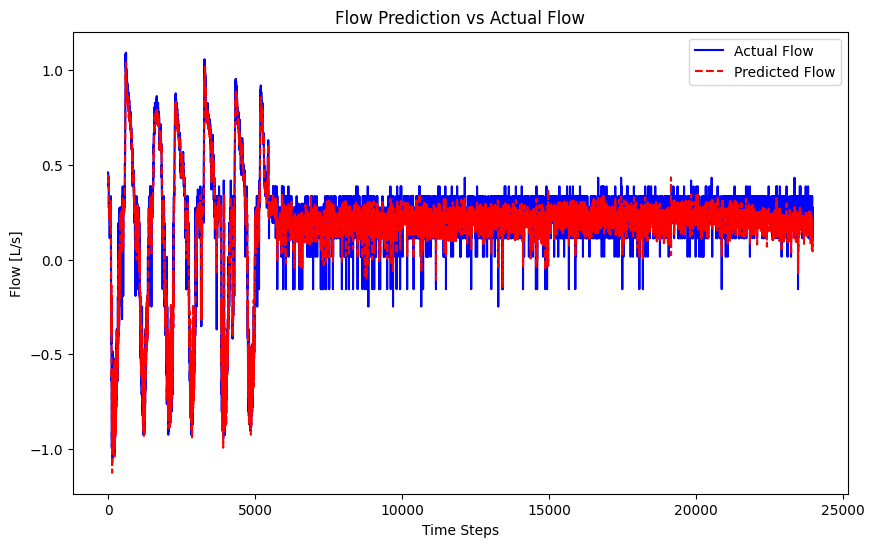

In [10]:
import matplotlib.pyplot as plt

# Make predictions
predictions = model.predict(test_generator)

# Since the test_generator reduces the length of the test set by n_input, adjust the y_test accordingly
adjusted_y_test = y_test[n_input:]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(adjusted_y_test, label='Actual Flow', color='blue')
plt.plot(predictions, label='Predicted Flow', color='red', linestyle='--')
plt.title('Flow Prediction vs Actual Flow')
plt.xlabel('Time Steps')
plt.ylabel('Flow [L/s]')
plt.legend()
plt.show()